In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 설명
 4개의 베어링이 축에 설치되었다. 회전 속도는 마찰 벨트를 통해 축에 결합된 AC 모터에 의해 2000rpm으로 일정하게 유지되었습니다. <br>
 6000lbs의 방사형 하중이 스프링 메커니즘에 의해 샤프트와 베어링에 인가됩니다. 모든 베어링은 강제 윤활됩니다.<br>
그림 1과 같이 축에 렉스노드 ZA-2115 이중 열 베어링이 장착되었습니다. PCB 353B33 고감도 쿼츠 ICP 가속도계가 베어링 하우징에 장착되었습니다(가속계 2개).<br>
데이터 세트 1의 각 베어링에 대해 [x 및 y-devel], 데이터 세트 2와 3)의 각 베어링에 대해 하나의 가속도계입니다.<br>
센서 위치는 그림 1에도 나와 있습니다. 모든 고장은 1억 회전이 넘는 베어링의 설계 수명을 초과한 후에 발생했습니다.<br>
<br>
<br>
# 데이터 구조
데이터 집합은 검정-고장 실험을 설명합니다. <br>
데이터 세트는 특정 간격으로 기록된 1초 진동 신호 스냅샷인 개별 파일로 구성됩니다. <br>
각 관측치 샘플링 속도가 20kHz로 설정된 20,480개의 포인트로 구성됩니다.<br>
 파일 이름은 데이터가 수집된 시기를 나타냅니다. 데이터 파일의 각 레코드(행)는 데이터 지점입니다. NIDAQ Card 6062E에 의해 데이터 수집이 촉진되었습니다. <br>
 타임스탬프의 간격이 길면(파일 이름에 표시됨) 다음 근무일에 실험이 재개됨을 나타냅니다.

In [ ]:
import numpy as np
import pandas as pd

from tqdm import tqdm # 반복문 진행 바 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime # 날짜 타입 사용을 위한 라이브러리

sns.set_style("white") # seaborn 그래프 형태 사전설정
sns.set_context("talk") # seaborn 그래프 형태 사전설정

warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Anomaly Detection 수진 윤표/Nasa_Bearing.csv', parse_dates= ['Unnamed: 0'])

In [ ]:
data.rename({'Unnamed: 0':'date_time'}, axis = 1, inplace = True)

In [ ]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  6324 non-null   datetime64[ns]
 1   Bearing 1  6324 non-null   float64       
 2   Bearing 2  6324 non-null   float64       
 3   Bearing 3  6324 non-null   float64       
 4   Bearing 4  6324 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 247.2 KB


In [ ]:
# 데이터를 기간별로 확인하기 위해 데이터프레임 슬라이싱
# iloc: 데이터프레임 슬라이싱 [시작행 : 끝행, 시작열 : 끝열]

data_0304_to0319 =  data.iloc[:2179,:]
data_0320_to0405 =  data.iloc[2179:4621,:]
data_0406_to0418 = data.iloc[4621:,:]

# 시각화를 위한 색상표

## 1. 단일 색상 (color 파라미터에 필요)
<img src = 'https://miro.medium.com/max/800/1*zm6zVTIEvf9uZ0cE4n0Ogg.png' width = '500' height = '300'>

## 2. 팔레트 (cmap 파라미터에 필요)
<img src = 'https://i2.wp.com/datavizpyr.com/wp-content/uploads/2020/01/RColorBrewer_colorblind_friendly_palettes.jpeg?fit=598%2C897&ssl=1' width = '400' height = '400'>

# 기준 기간 별 베어링 진동 시각화

In [ ]:
# 새로운 열을 만들어준다. (파생변수)
# date_time열 (날짜 시간이 표현되어 있는)에서 월, 일, 시간을 추출해서 변수 생성

data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.day
data['hour'] = data['date_time'].dt.hour

In [ ]:
data.head()

,date_time,Bearing 1,Bearing 2,Bearing 3,Bearing 4,month,day,hour
0,2004-03-04 09:27:46,0.061630,0.075278,0.051991,0.043475,3,4,9
1,2004-03-04 09:32:46,0.060774,0.072206,0.052239,0.042039,3,4,9
2,2004-03-04 09:42:46,0.062195,0.072886,0.054809,0.041360,3,4,9
3,2004-03-04 09:52:46,0.062994,0.073433,0.054261,0.043126,3,4,9
4,2004-03-04 10:02:46,0.061945,0.073006,0.053237,0.042617,3,4,10


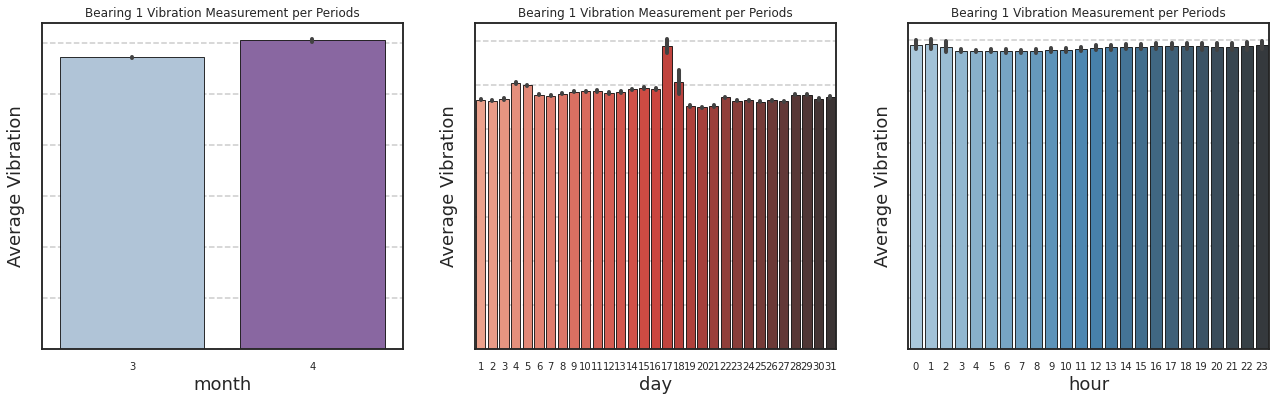

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (22, 6))
ax[0].grid(axis='y', linestyle='--')
ax[1].grid(axis='y', linestyle='--')
ax[2].grid(axis='y', linestyle='--')

sns.barplot(x = 'month', y = "Bearing 1", data = data, ax = ax[0], palette = "BuPu",edgecolor='black', linewidth=0.8)
sns.barplot(x = 'day', y = "Bearing 1", data = data, ax = ax[1], palette = "Reds_d",edgecolor='black', linewidth=0.8)
sns.barplot(x = 'hour', y = "Bearing 1", data = data, ax = ax[2], palette = "Blues_d",edgecolor='black', linewidth=0.8)
  
for i in range(3):
  ax[i].set_title("Bearing 1 Vibration Measurement per Periods", size = 12)
  ax[i].set_xticklabels(labels = ax[i].get_xticklabels(), fontsize = 10)
  ax[i].set_yticklabels(labels = ax[i].get_yticklabels(), fontsize = 10)
  ax[i].set_ylabel("Average Vibration", size = 18)

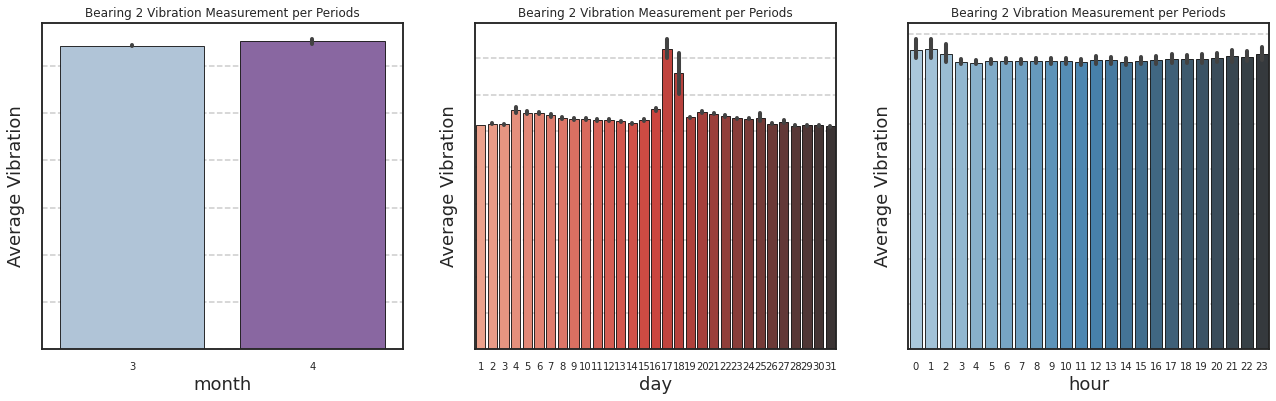

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (22, 6))
ax[0].grid(axis='y', linestyle='--')
ax[1].grid(axis='y', linestyle='--')
ax[2].grid(axis='y', linestyle='--')

sns.barplot(x = 'month', y = "Bearing 2", data = data, ax = ax[0], palette = "BuPu",edgecolor='black', linewidth=0.8)
sns.barplot(x = 'day', y = "Bearing 2", data = data, ax = ax[1], palette = "Reds_d",edgecolor='black', linewidth=0.8)
sns.barplot(x = 'hour', y = "Bearing 2", data = data, ax = ax[2], palette = "Blues_d",edgecolor='black', linewidth=0.8)
  
for i in range(3):
  ax[i].set_title("Bearing 2 Vibration Measurement per Periods", size = 12)
  ax[i].set_xticklabels(labels = ax[i].get_xticklabels(), fontsize = 10)
  ax[i].set_yticklabels(labels = ax[i].get_yticklabels(), fontsize = 10)
  ax[i].set_ylabel("Average Vibration", size = 18)

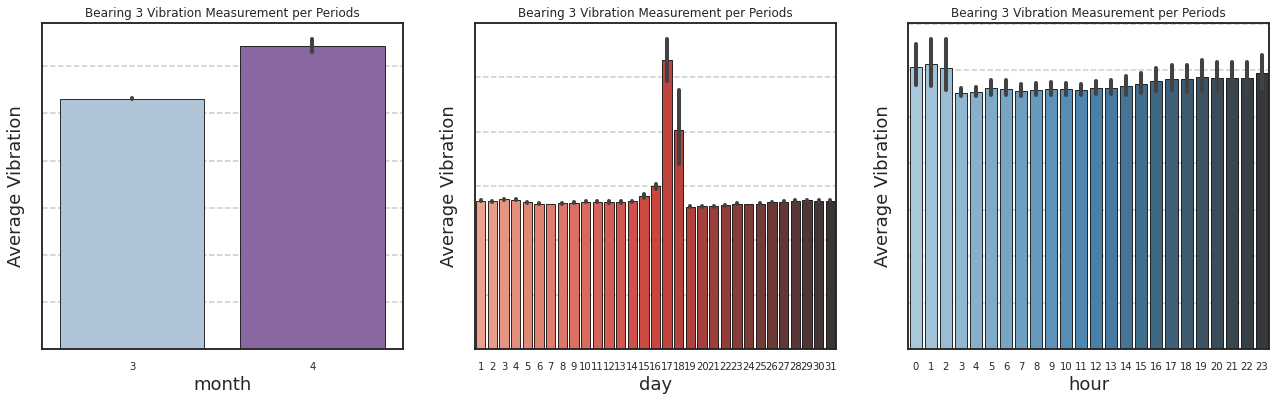

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (22, 6))
ax[0].grid(axis='y', linestyle='--')
ax[1].grid(axis='y', linestyle='--')
ax[2].grid(axis='y', linestyle='--')

sns.barplot(x = 'month', y = "Bearing 3", data = data, ax = ax[0], palette = "BuPu",edgecolor='black', linewidth=0.8)
sns.barplot(x = 'day', y = "Bearing 3", data = data, ax = ax[1], palette = "Reds_d",edgecolor='black', linewidth=0.8)
sns.barplot(x = 'hour', y = "Bearing 3", data = data, ax = ax[2], palette = "Blues_d",edgecolor='black', linewidth=0.8)
  
for i in range(3):
  ax[i].set_title("Bearing 3 Vibration Measurement per Periods", size = 12)
  ax[i].set_xticklabels(labels = ax[i].get_xticklabels(), fontsize = 10)
  ax[i].set_yticklabels(labels = ax[i].get_yticklabels(), fontsize = 10)
  ax[i].set_ylabel("Average Vibration", size = 18)

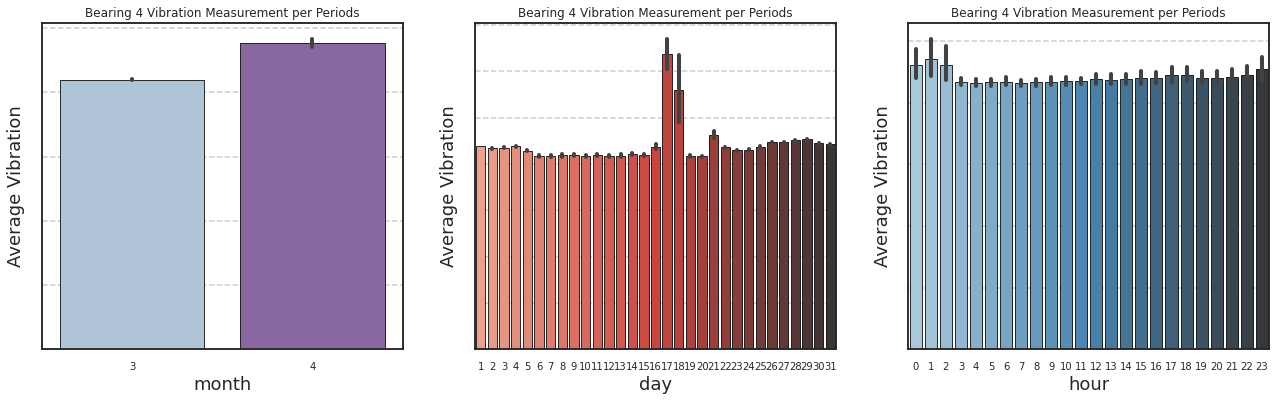

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (22, 6))
ax[0].grid(axis='y', linestyle='--')
ax[1].grid(axis='y', linestyle='--')
ax[2].grid(axis='y', linestyle='--')

sns.barplot(x = 'month', y = "Bearing 4", data = data, ax = ax[0], palette = "BuPu",edgecolor='black', linewidth=0.8)
sns.barplot(x = 'day', y = "Bearing 4", data = data, ax = ax[1], palette = "Reds_d",edgecolor='black', linewidth=0.8)
sns.barplot(x = 'hour', y = "Bearing 4", data = data, ax = ax[2], palette = "Blues_d",edgecolor='black', linewidth=0.8)
  
for i in range(3):
  ax[i].set_title("Bearing 4 Vibration Measurement per Periods", size = 12)
  ax[i].set_xticklabels(labels = ax[i].get_xticklabels(), fontsize = 10)
  ax[i].set_yticklabels(labels = ax[i].get_yticklabels(), fontsize = 10)
  ax[i].set_ylabel("Average Vibration", size = 18)

## 전체 기간 시각화

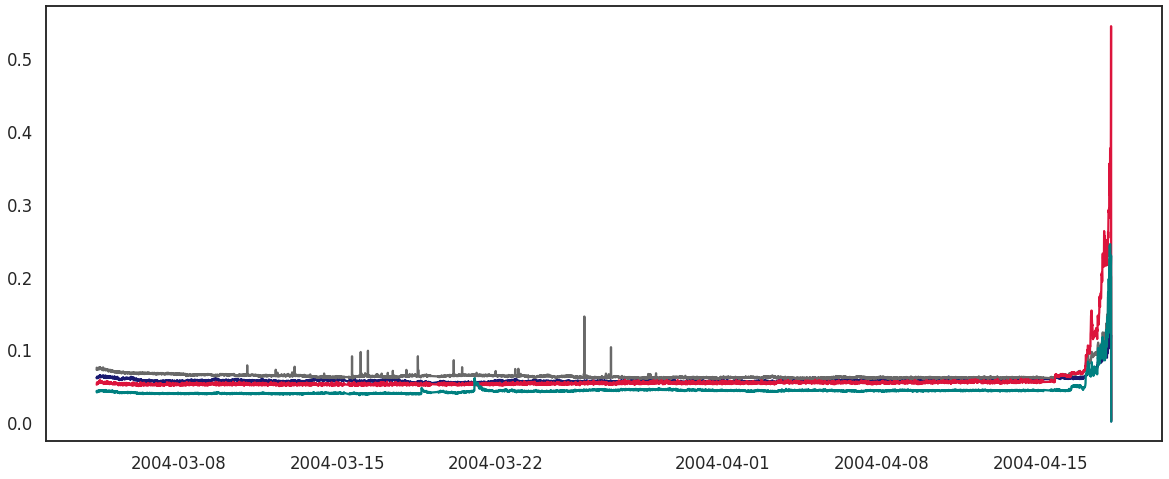

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8))

# Bearing1
Bearing1_color = 'midnightblue'
ax.plot(data['date_time'], data['Bearing 1'], c = Bearing1_color)

# Bearing2
Bearing2_color = 'dimgray'
ax.plot(data['date_time'], data['Bearing 2'], c = Bearing2_color)

# Bearing3
Bearing3_color = 'crimson'
ax.plot(data['date_time'], data['Bearing 3'], c = Bearing3_color)

# Bearing4
Bearing4_color = 'teal'
ax.plot(data['date_time'], data['Bearing 4'], c = Bearing4_color)

## 기간별 시각화 & 차트 꾸미기

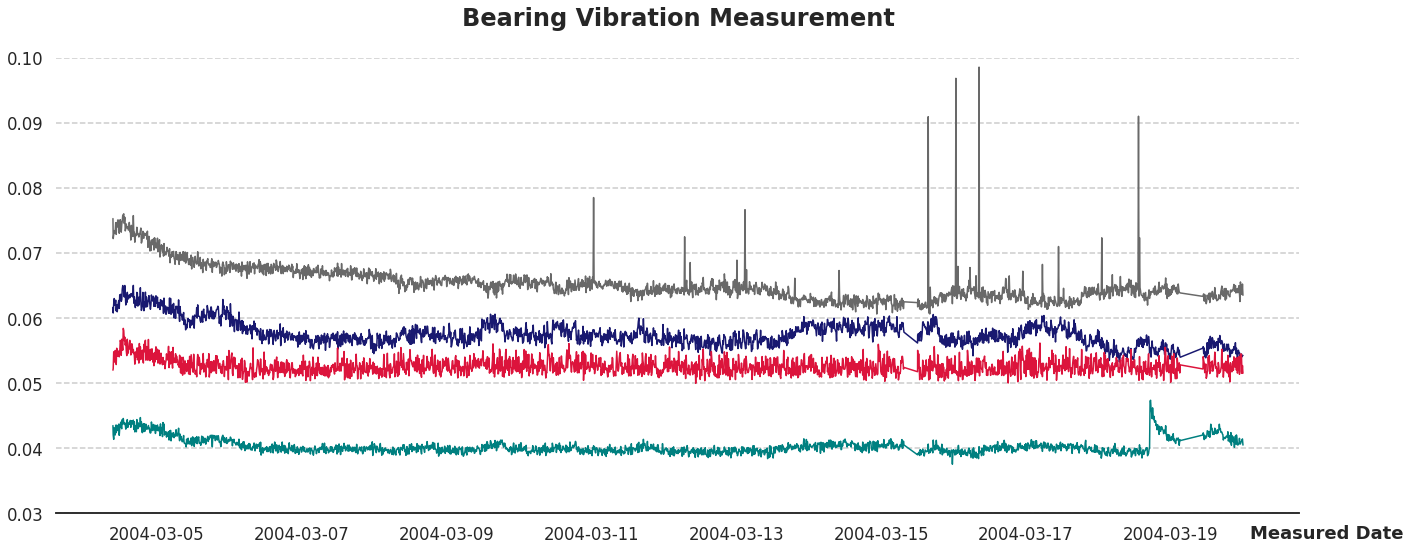

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8), facecolor = 'w')

# Bearing1
Bearing1_color = 'midnightblue'
ax.plot(data_0304_to0319['date_time'], data_0304_to0319['Bearing 1'], c = Bearing1_color, linewidth = 1.5)

# Bearing2
Bearing2_color = 'dimgray'
ax.plot(data_0304_to0319['date_time'], data_0304_to0319['Bearing 2'], c = Bearing2_color, linewidth = 1.5)

# Bearing3
Bearing3_color = 'crimson'
ax.plot(data_0304_to0319['date_time'], data_0304_to0319['Bearing 3'], c = Bearing3_color, linewidth = 1.5)

# Bearing4
Bearing4_color = 'teal'
ax.plot(data_0304_to0319['date_time'], data_0304_to0319['Bearing 4'], c = Bearing4_color, linewidth = 1.5)

# spines 정리
for s in ['left', 'right', 'top']:
  ax.spines[s].set_visible(False)

# y축 범위 지정
ax.set_ylim(0.03, 0.1)

# x축 라벨링
font_xlabel = {'fontsize' : 18, 'ha' : 'left', 'fontweight' : 'bold'}
ax.text(0.96, -0.055, 'Measured Date', transform = ax.transAxes, fontdict = font_xlabel)

# 제목 표시
ax.set_title('Bearing Vibration Measurement', fontsize = 24, fontweight = 'bold', pad = 32)

# grid 추가
ax.grid(axis = 'y', linestyle='--')

fig.tight_layout()

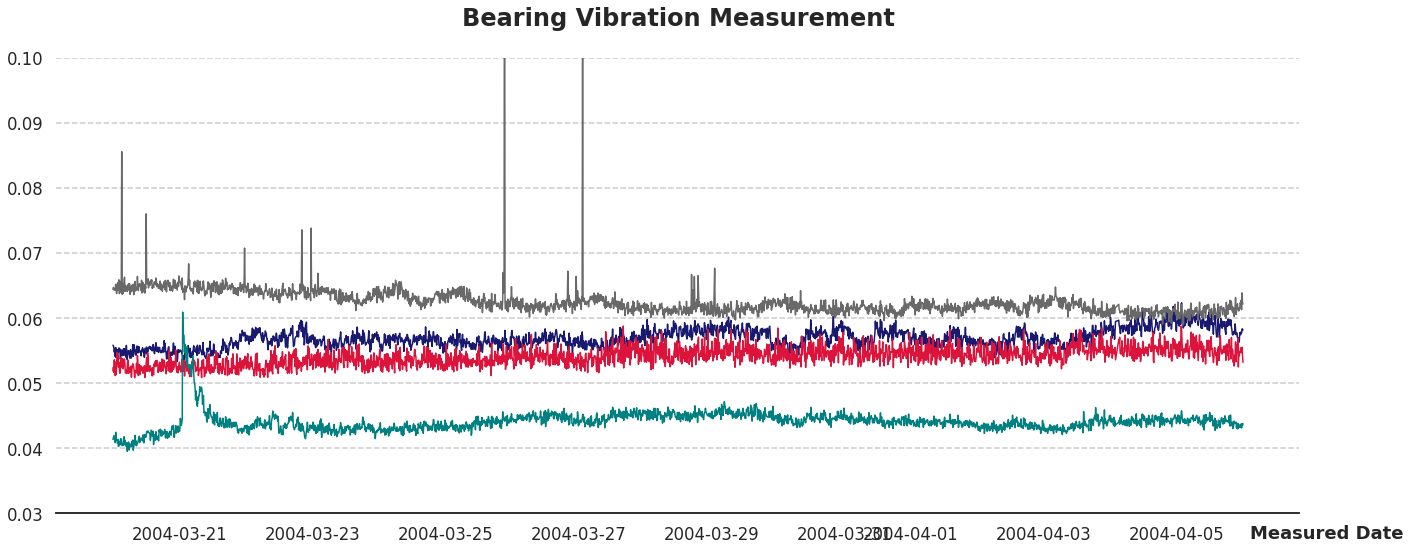

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8), facecolor = 'w')

# Bearing1
Bearing1_color = 'midnightblue'
ax.plot(data_0320_to0405['date_time'], data_0320_to0405['Bearing 1'], c = Bearing1_color, linewidth = 1.5)

# Bearing2
Bearing2_color = 'dimgray'
ax.plot(data_0320_to0405['date_time'], data_0320_to0405['Bearing 2'], c = Bearing2_color, linewidth = 1.5)

# Bearing3
Bearing3_color = 'crimson'
ax.plot(data_0320_to0405['date_time'], data_0320_to0405['Bearing 3'], c = Bearing3_color, linewidth = 1.5)

# Bearing4
Bearing4_color = 'teal'
ax.plot(data_0320_to0405['date_time'], data_0320_to0405['Bearing 4'], c = Bearing4_color, linewidth = 1.5)

# spines 정리
for s in ['left', 'right', 'top']:
  ax.spines[s].set_visible(False)

# y축 범위 지정
ax.set_ylim(0.03, 0.1)

# x축 라벨링
font_xlabel = {'fontsize' : 18, 'ha' : 'left', 'fontweight' : 'bold'}
ax.text(0.96, -0.055, 'Measured Date', transform = ax.transAxes, fontdict = font_xlabel)

# 제목 표시
ax.set_title('Bearing Vibration Measurement', fontsize = 24, fontweight = 'bold', pad = 32)

# grid 추가
ax.grid(axis = 'y', linestyle='--')

fig.tight_layout()

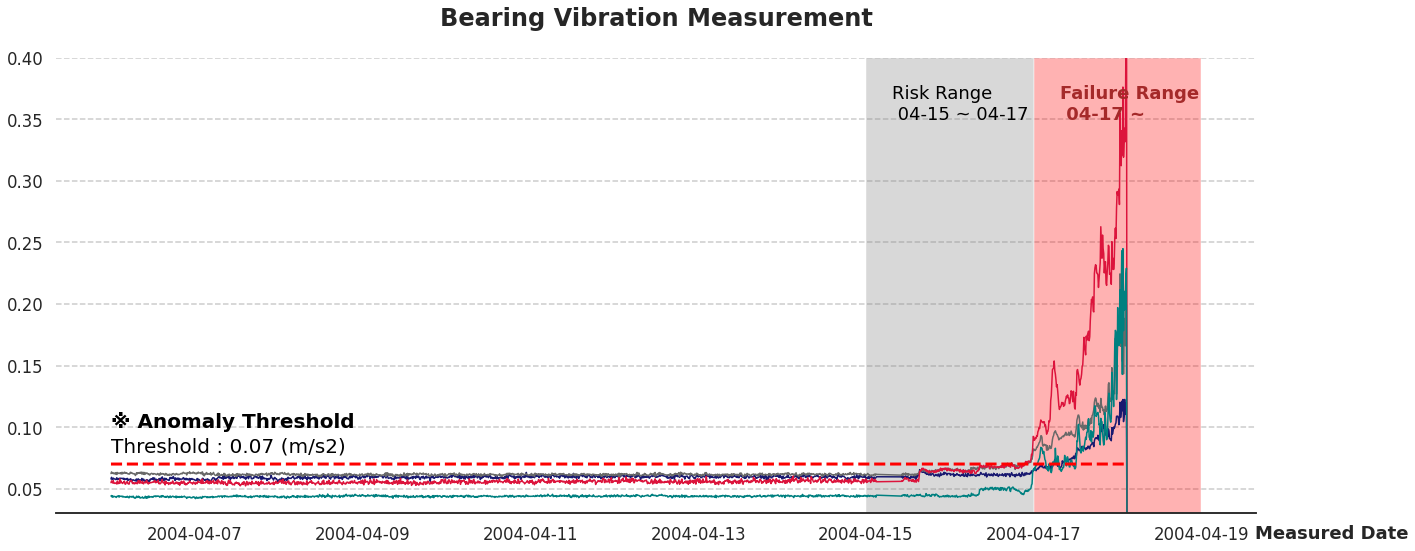

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8), facecolor = 'w')

# Bearing1
Bearing1_color = 'midnightblue'
ax.plot(data_0406_to0418['date_time'], data_0406_to0418['Bearing 1'], c = Bearing1_color, linewidth = 1.5)

# Bearing2
Bearing2_color = 'dimgray'
ax.plot(data_0406_to0418['date_time'], data_0406_to0418['Bearing 2'], c = Bearing2_color, linewidth = 1.5)

# Bearing3
Bearing3_color = 'crimson'
ax.plot(data_0406_to0418['date_time'], data_0406_to0418['Bearing 3'], c = Bearing3_color, linewidth = 1.5)

# Bearing4
Bearing4_color = 'teal'
ax.plot(data_0406_to0418['date_time'], data_0406_to0418['Bearing 4'], c = Bearing4_color, linewidth = 1.5)

# spines 정리
for s in ['left', 'right', 'top']:
  ax.spines[s].set_visible(False)

# y축 범위 지정
ax.set_ylim(0.03, 0.4)

# x축 라벨링
font_xlabel = {'fontsize' : 18, 'ha' : 'left', 'fontweight' : 'bold'}
ax.text(0.999, -0.055, 'Measured Date', transform = ax.transAxes, fontdict = font_xlabel)

# 제목 표시
ax.set_title('Bearing Vibration Measurement', fontsize = 24, fontweight = 'bold', pad = 32)

# 위험범위 박스 추가
risk_start = datetime(2004, 4, 15)
risk_end = datetime(2004, 4, 17)
ax.axvspan(xmin = risk_start, xmax = risk_end, fc="gray", alpha=0.3)
ax.text(datetime(2004, 4, 15, 7, 30), 0.35, "Risk Range \n 04-15 ~ 04-17",  color="k")

# 장비 결함 박스 추가
failure_start = datetime(2004, 4, 17)
failure_end = datetime(2004, 4, 19)
ax.axvspan(xmin = failure_start, xmax = failure_end, fc="r", alpha=0.3)
ax.text(datetime(2004, 4, 17, 7, 30), 0.35, "Failure Range \n 04-17 ~",  color="brown", fontweight = 'bold')

# 가상의 임계값 라인 추가
ax.plot(data_0406_to0418['date_time'], [0.07 for i in range(1703)], c = 'r', linewidth = 3, linestyle = '--')

# 임계값 설명 추가
font_category = {"fontsize":20, "ha":"left", "color":"k"}
ax.text(datetime(2004, 4, 6), 0.1, "※ Anomaly Threshold", fontdict=font_category, fontweight="bold") 
ax.text(datetime(2004, 4, 6), 0.08, 'Threshold : 0.07 (m/s2)', fontdict=font_category)

# grid 추가
ax.grid(axis = 'y', linestyle='--')

fig.tight_layout()

# 전처리 및 변수 추출

### 1. Log 변환
### 2. FFT
### 3. FE

### 주파수 스펙트럼 분석
- 푸리에 변환 이전 어떤 주파수를 사용해야 하는지 확인
- 스펙트럼 그래프에서 높은 값을 가지는 성분의 주파수를 선택
- https://crazyj.tistory.com/160
<br>
<br>
data_0304_to0319 <br>
data_0320_to0405 <br>
data_0406_to0418 <br>

In [ ]:
data.iloc[:5917,:]

,date_time,Bearing 1,Bearing 2,Bearing 3,Bearing 4,month,day,hour
0,2004-03-04 09:27:46,0.061630,0.075278,0.051991,0.043475,3,4,9
1,2004-03-04 09:32:46,0.060774,0.072206,0.052239,0.042039,3,4,9
2,2004-03-04 09:42:46,0.062195,0.072886,0.054809,0.041360,3,4,9
3,2004-03-04 09:52:46,0.062994,0.073433,0.054261,0.043126,3,4,9
4,2004-03-04 10:02:46,0.061945,0.073006,0.053237,0.042617,3,4,10
...,...,...,...,...,...,...,...,...
5912,2004-04-14 23:11:57,0.059220,0.060920,0.057360,0.043859,4,14,23
5913,2004-04-14 23:21:57,0.059557,0.060610,0.054541,0.044381,4,14,23
5914,2004-04-14 23:31:57,0.059387,0.061862,0.056988,0.044023,4,14,23
5915,2004-04-14 23:41:57,0.061110,0.061716,0.057055,0.044596,4,14,23


In [ ]:
train = data.iloc[3907:5917,:]
test = data.iloc[5917:,:]
data = pd.concat([train, test], axis = 0)

In [ ]:
train_fft = np.fft.fft(train.loc[:,'Bearing 1' : 'Bearing 4'])
test_fft = np.fft.fft(test.loc[:,'Bearing 1' : 'Bearing 4'])

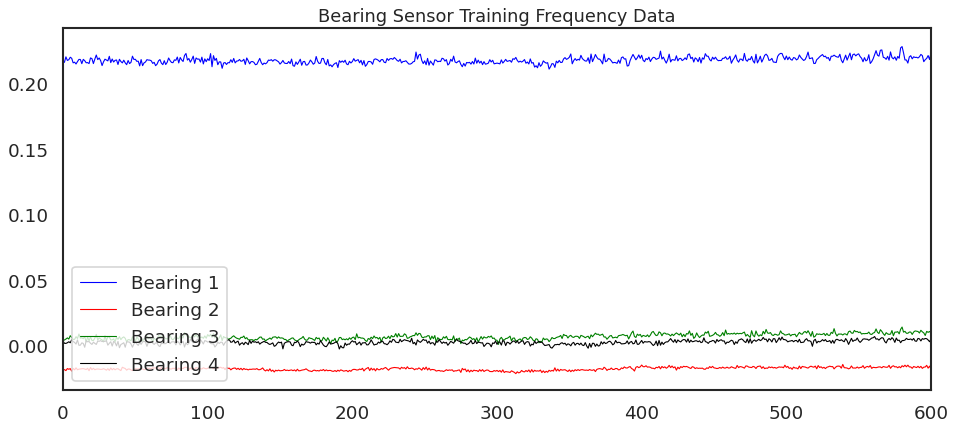

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train_fft[:,0].real, label='Bearing 1', color='blue', animated = True, linewidth=1)
ax.plot(train_fft[:,1].imag, label='Bearing 2', color='red', animated = True, linewidth=1)
ax.plot(train_fft[:,2].real, label='Bearing 3', color='green', animated = True, linewidth=1)
ax.plot(train_fft[:,3].real, label='Bearing 4', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
plt.xlim(0, 600)
ax.set_title('Bearing Sensor Training Frequency Data', fontsize=16)
plt.show()

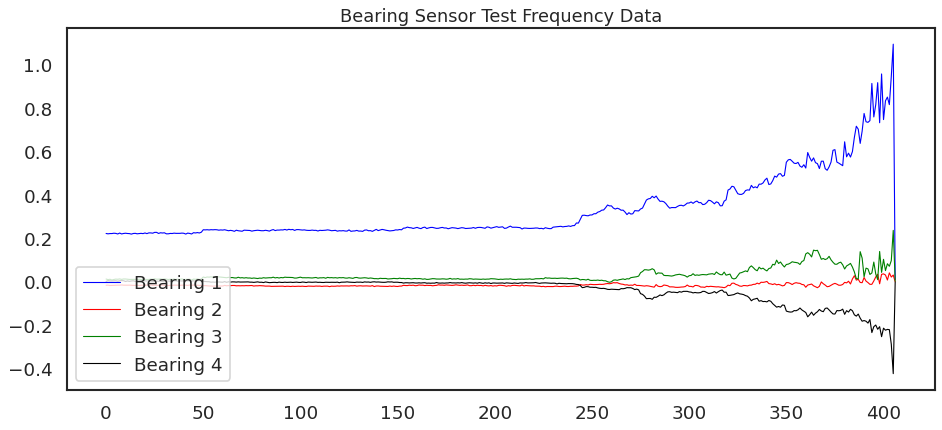

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(test_fft[:,0].real, label='Bearing 1', color='blue', animated = True, linewidth=1)
ax.plot(test_fft[:,1].imag, label='Bearing 2', color='red', animated = True, linewidth=1)
ax.plot(test_fft[:,2].real, label='Bearing 3', color='green', animated = True, linewidth=1)
ax.plot(test_fft[:,3].real, label='Bearing 4', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Bearing Sensor Test Frequency Data', fontsize=16)
plt.show()

In [ ]:
train[['Bearing 1 fft', 'Bearing 2 fft', 'Bearing 3 fft', 'Bearing 4 fft']] = train_fft
test[['Bearing 1 fft', 'Bearing 2 fft', 'Bearing 3 fft', 'Bearing 4 fft']] = test_fft

In [ ]:
train.drop(['month', 'day', 'hour'], axis = 1, inplace = True)
test.drop(['month', 'day', 'hour'], axis = 1, inplace = True)

In [ ]:
def complex_to_real(x):
  return x.real

train['Bearing 1 fft'] = train['Bearing 1 fft'].apply(complex_to_real)
train['Bearing 2 fft'] = train['Bearing 2 fft'].apply(complex_to_real)
train['Bearing 3 fft'] = train['Bearing 3 fft'].apply(complex_to_real)
train['Bearing 4 fft'] = train['Bearing 4 fft'].apply(complex_to_real)

test['Bearing 1 fft'] = test['Bearing 1 fft'].apply(complex_to_real)
test['Bearing 2 fft'] = test['Bearing 2 fft'].apply(complex_to_real)
test['Bearing 3 fft'] = test['Bearing 3 fft'].apply(complex_to_real)
test['Bearing 4 fft'] = test['Bearing 4 fft'].apply(complex_to_real)

In [ ]:
# 딥러닝 모델에 효과적으로 학습시키기 위해선 Scaling 과정이 필요하다.
# MinMaxScaler는 모든 데이터를 0~1 사이의 값으로 Scaling 해준다.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(train.loc[:,'Bearing 1' : 'Bearing 4'])
X_test = scaler.transform(test.loc[:,'Bearing 1' : 'Bearing 4'])

In [ ]:
X_train.shape

(2010, 4)

In [ ]:
# 딥러닝 모델에 입력값으로 사용하기 위해 데이터 차원을 3차원으로 변경해준다.

X_train = X_train.reshape(X_train.shape[0], 1 , X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras import regularizers
from keras.optimizers import Adam

In [ ]:
def autoencoder_model(x):
  inputs = Input(shape = (x.shape[1], x.shape[2]))
  L1 = LSTM(32, activation = 'relu', return_sequences=True,
            kernel_regularizer = regularizers.l2(0.00))(inputs)
  L2 = LSTM(16, activation='relu', return_sequences=False)(L1)
  L3 = RepeatVector(x.shape[1])(L2)
  L4 = LSTM(16, activation='relu', return_sequences=True)(L3)
  L5 = LSTM(32, activation='relu', return_sequences=True)(L4)
  output = TimeDistributed(Dense(x.shape[2]))(L5)
  model = Model(inputs = inputs, outputs = output)
  return model

In [ ]:
model = autoencoder_model(X_train)
model.compile(Adam(1e-3), loss = 'mae')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 4)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 32)             4736      
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                3136      
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 16)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 16)             2112      
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 32)             6272      
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 4)              132   

In [ ]:
nb_epochs = 200
batch_size = 16
history = model.fit(X_train, X_train, epochs = nb_epochs, batch_size = batch_size,
                    validation_split = 0.1).history

Epoch 1/200
114/114 [==============================] - 27s 26ms/step - loss: 0.3845 - val_loss: 0.0971
Epoch 2/200
114/114 [==============================] - 1s 11ms/step - loss: 0.1068 - val_loss: 0.0769
Epoch 3/200
114/114 [==============================] - 1s 11ms/step - loss: 0.0926 - val_loss: 0.0770
Epoch 4/200
114/114 [==============================] - 1s 12ms/step - loss: 0.0923 - val_loss: 0.0805
Epoch 5/200
114/114 [==============================] - 1s 11ms/step - loss: 0.0902 - val_loss: 0.0781
Epoch 6/200
114/114 [==============================] - 1s 12ms/step - loss: 0.0857 - val_loss: 0.0779
Epoch 7/200
114/114 [==============================] - 1s 12ms/step - loss: 0.0861 - val_loss: 0.0742
Epoch 8/200
114/114 [==============================] - 1s 12ms/step - loss: 0.0721 - val_loss: 0.0620
Epoch 9/200
114/114 [==============================] - 1s 12ms/step - loss: 0.0624 - val_loss: 0.0657
Epoch 10/200
114/114 [==============================] - 1s 12ms/step - loss: 0.06

(0.0, 0.015)

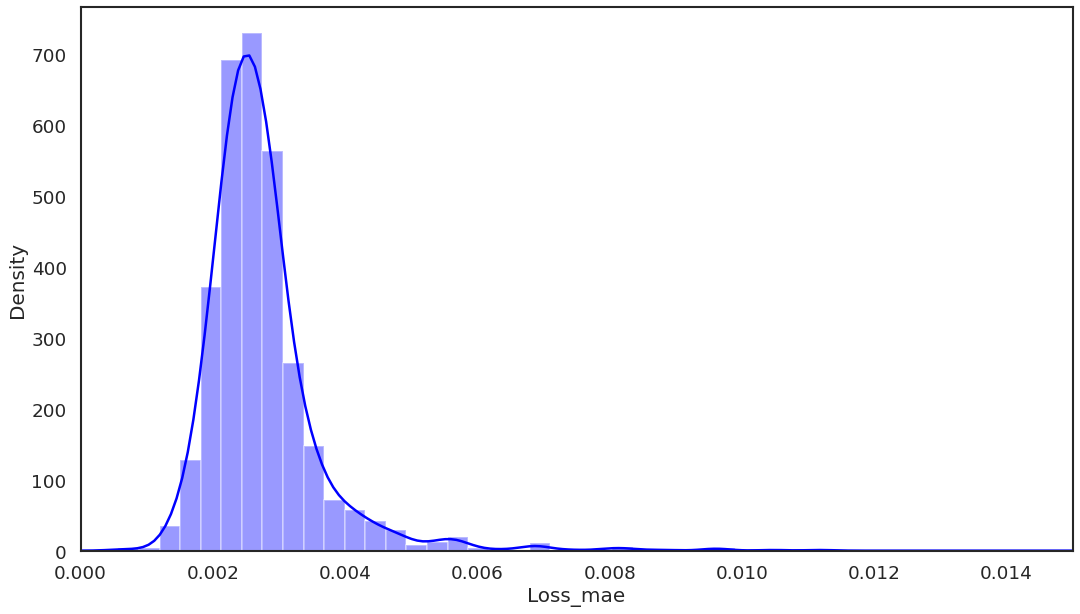

In [ ]:
x_pred = model.predict(X_train)
x_pred = x_pred.reshape(x_pred.shape[0], x_pred.shape[2])
x_pred = pd.DataFrame(x_pred, columns = train.loc[:,'Bearing 1' : 'Bearing 4'].columns)
x_pred.index = train.index

scored = pd.DataFrame(index = train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(x_pred-Xtrain), axis = 1)

plt.figure(figsize = (16, 9), dpi = 80)
sns.distplot(scored['Loss_mae'], bins = 50, kde = True, color = 'blue')
plt.xlim([0.0, .015])

In [ ]:
x_pred = model.predict(X_test)
x_pred = x_pred.reshape(x_pred.shape[0], x_pred.shape[2])
x_pred = pd.DataFrame(x_pred, columns = test.loc[:,'Bearing 1' : 'Bearing 4'].columns)
x_pred.index = test['date_time']

scored = pd.DataFrame(index = test['date_time'])
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored['Loss_mae'] = np.mean(np.abs(x_pred - Xtest), axis = 1)
scored['Threshold'] = 0.015
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
date_time,,,
2004-04-15 00:01:57,0.004443,0.015,False
2004-04-15 00:11:57,0.002026,0.015,False
2004-04-15 00:21:57,0.002799,0.015,False
2004-04-15 00:31:57,0.002365,0.015,False
2004-04-15 00:41:57,0.003145,0.015,False


In [ ]:
x_pred_train = model.predict(X_train)
x_pred_train = x_pred_train.reshape(x_pred_train.shape[0], x_pred_train.shape[2])
x_pred_train = pd.DataFrame(x_pred_train, columns = train.loc[:,'Bearing 1' : 'Bearing 4'].columns)
x_pred_train.index = train['date_time']

scored_train = pd.DataFrame(index = train['date_time'])
scored_train['Loss_mae'] = np.mean(np.abs(x_pred_train - Xtrain), axis = 1)
scored_train['Threshold'] = 0.015
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

In [ ]:
scored

,Loss_mae,Threshold,Anomaly
date_time,,,
2004-04-01 00:01:57,0.002724,0.015,False
2004-04-01 00:11:57,0.002429,0.015,False
2004-04-01 00:21:57,0.003907,0.015,False
2004-04-01 00:31:57,0.002091,0.015,False
2004-04-01 00:41:57,0.002502,0.015,False
...,...,...,...
2004-04-18 02:02:55,22.364265,0.015,True
2004-04-18 02:12:55,22.493651,0.015,True
2004-04-18 02:22:55,26.068868,0.015,True


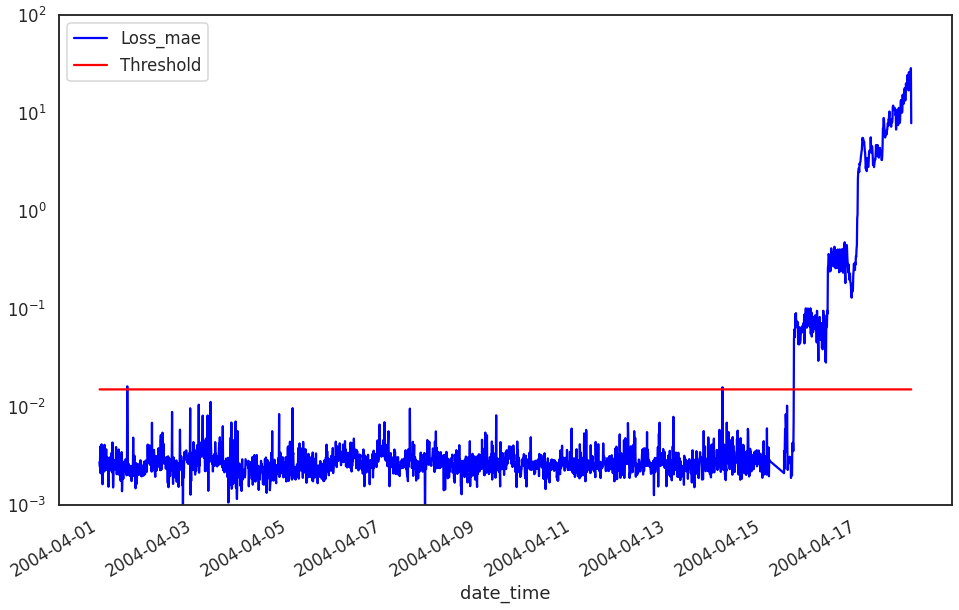

In [ ]:
scored.plot(logy = True, figsize = (16, 10), ylim = [1e-3, 1e2], color = ['blue', 'red'])

In [ ]:
# 실제 데이터 셋에 시각화해보기
# 실제 데이터의 Threshold(이상판별 관측치의 최소값) and 박스처리 (warnging, crucial)

anomaly_scored = scored.loc[scored['Anomaly'] == True]
anomaly_scored.loc[anomaly_scored['Loss_mae'] == anomaly_scored['Loss_mae'].min()]

,Loss_mae,Threshold,Anomaly
date_time,,,
2004-04-15 23:52:55,0.080428,0.08,True


In [ ]:
data.loc[data['date_time'] == '2004-04-16 05:52:55']

,date_time,Bearing 1,Bearing 2,Bearing 3,Bearing 4,month,day,hour
6054,2004-04-16 05:52:55,0.06045,0.063422,0.062426,0.044471,4,16,5


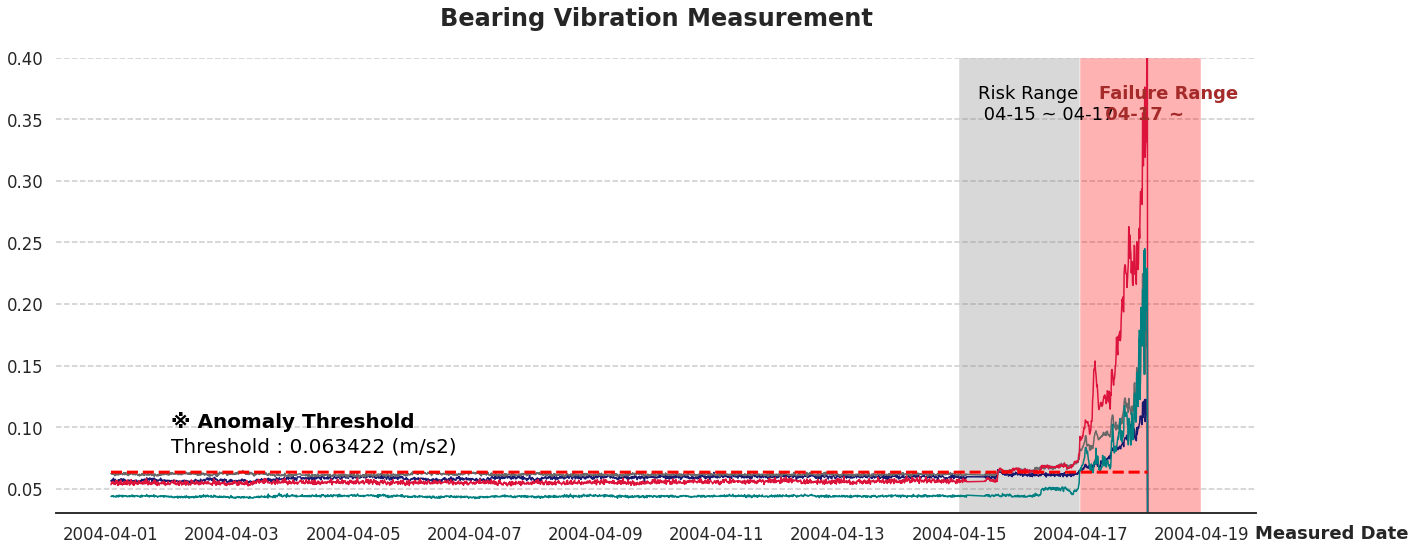

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8), facecolor = 'w')

# Bearing1
Bearing1_color = 'midnightblue'
ax.plot(data['date_time'], data['Bearing 1'], c = Bearing1_color, linewidth = 1.5)

# Bearing2
Bearing2_color = 'dimgray'
ax.plot(data['date_time'], data['Bearing 2'], c = Bearing2_color, linewidth = 1.5)

# Bearing3
Bearing3_color = 'crimson'
ax.plot(data['date_time'], data['Bearing 3'], c = Bearing3_color, linewidth = 1.5)

# Bearing4
Bearing4_color = 'teal'
ax.plot(data['date_time'], data['Bearing 4'], c = Bearing4_color, linewidth = 1.5)

# spines 정리
for s in ['left', 'right', 'top']:
  ax.spines[s].set_visible(False)

# y축 범위 지정
ax.set_ylim(0.03, 0.4)

# x축 라벨링
font_xlabel = {'fontsize' : 18, 'ha' : 'left', 'fontweight' : 'bold'}
ax.text(0.999, -0.055, 'Measured Date', transform = ax.transAxes, fontdict = font_xlabel)

# 제목 표시
ax.set_title('Bearing Vibration Measurement', fontsize = 24, fontweight = 'bold', pad = 32)

# 위험범위 박스 추가
risk_start = datetime(2004, 4, 15)
risk_end = datetime(2004, 4, 17)
ax.axvspan(xmin = risk_start, xmax = risk_end, fc="gray", alpha=0.3)
ax.text(datetime(2004, 4, 15, 7, 30), 0.35, "Risk Range \n 04-15 ~ 04-17",  color="k")

# 장비 결함 박스 추가
failure_start = datetime(2004, 4, 17)
failure_end = datetime(2004, 4, 19)
ax.axvspan(xmin = failure_start, xmax = failure_end, fc="r", alpha=0.3)
ax.text(datetime(2004, 4, 17, 7, 30), 0.35, "Failure Range \n 04-17 ~",  color="brown", fontweight = 'bold')

# 가상의 임계값 라인 추가
ax.plot(data['date_time'], [0.063422 for i in range(2417)], c = 'r', linewidth = 3, linestyle = '--')

# 임계값 설명 추가
font_category = {"fontsize":20, "ha":"left", "color":"k"}
ax.text(datetime(2004, 4, 2), 0.1, "※ Anomaly Threshold", fontdict=font_category, fontweight="bold") 
ax.text(datetime(2004, 4, 2), 0.08, 'Threshold : 0.063422 (m/s2)', fontdict=font_category)

# grid 추가
ax.grid(axis = 'y', linestyle='--')

fig.tight_layout()